In [27]:
####DATA PREPARATION####
import pandas as pd
#Load data_frame
col_names = ['Time', 'Source', 'Destination', 'Protocol', 'Lenght', 'Info']
data_frame = pd.read_csv("test2.csv", header=0, names=col_names)

In [28]:
data_frame.describe()

,Time,Lenght
count,37027.000000,37027.000000
mean,460.195397,1005.353364
std,305.136903,598.347191
min,0.000000,42.000000
25%,206.875709,123.000000
50%,493.221121,1392.000000
75%,711.299469,1392.000000
max,962.338090,6395.000000


In [29]:
# Get row indexes that doesn't contain protocols: TCP/UDP/DNS/HTTP
indexNames = data_frame[(data_frame['Protocol'] != 'TCP') & (data_frame['Protocol'] != 'UDP') &
                        (data_frame['Protocol'] != 'HTTP') & (data_frame['Protocol'] != 'DNS')].index


# Delete these row indexes from dataFrame
data_frame.drop(indexNames , inplace=True)
data_frame.head(20)

,Time,Source,Destination,Protocol,Lenght,Info
4,4.663904,192.168.0.2,192.168.0.1,DNS,74,Standard query 0xe2bd A www.google.com
5,4.694362,192.168.0.2,192.168.0.1,DNS,74,Standard query 0xe2bd A www.google.com
6,4.716766,192.168.0.1,192.168.0.2,DNS,338,Standard query response 0xe2bd A www.google.co...
7,4.718291,192.168.0.2,172.217.16.36,UDP,1392,51270 > 443 Len=1350
8,4.719474,192.168.0.2,172.217.16.36,UDP,1392,51271 > 443 Len=1350
9,4.719673,192.168.0.2,172.217.16.36,UDP,560,51270 > 443 Len=518
10,4.719879,192.168.0.2,172.217.16.36,UDP,1070,51271 > 443 Len=1028
11,4.720016,192.168.0.2,172.217.16.36,UDP,209,51271 > 443 Len=167
12,4.734423,192.168.0.2,172.217.16.36,UDP,145,51271 > 443 Len=103
13,4.796940,172.217.16.36,192.168.0.2,UDP,1392,443 > 51270 Len=1350


In [30]:
data_frame.describe()

,Time,Lenght
count,32479.000000,32479.000000
mean,457.126278,1045.444472
std,305.660709,584.625897
min,4.663904,54.000000
25%,206.880030,130.500000
50%,472.871355,1392.000000
75%,687.867313,1392.000000
max,962.064411,1454.000000


In [31]:
#Creating columns to identify protocol
data_frame["checkIfHas53"]= data_frame["Protocol"].str.find('DNS') # <-- Can't get port from raw info so we do it manually
data_frame["checkIfHas80"]= data_frame["Info"].str.find('80')
data_frame["checkIfHas443"]= data_frame["Info"].str.find('443') 

data_frame

,Time,Source,Destination,Protocol,Lenght,Info,checkIfHas53,checkIfHas80,checkIfHas443
4,4.663904,192.168.0.2,192.168.0.1,DNS,74,Standard query 0xe2bd A www.google.com,0,-1,-1
5,4.694362,192.168.0.2,192.168.0.1,DNS,74,Standard query 0xe2bd A www.google.com,0,-1,-1
6,4.716766,192.168.0.1,192.168.0.2,DNS,338,Standard query response 0xe2bd A www.google.co...,0,216,-1
7,4.718291,192.168.0.2,172.217.16.36,UDP,1392,51270 > 443 Len=1350,-1,-1,10
8,4.719474,192.168.0.2,172.217.16.36,UDP,1392,51271 > 443 Len=1350,-1,-1,10
...,...,...,...,...,...,...,...,...,...
37022,962.019466,212.2.121.78,192.168.0.2,UDP,1392,443 > 53373 Len=1350,-1,-1,0
37023,962.020247,212.2.121.78,192.168.0.2,UDP,1392,443 > 53373 Len=1350,-1,-1,0
37024,962.020249,212.2.121.78,192.168.0.2,UDP,228,443 > 53373 Len=186,-1,-1,0
37025,962.025728,192.168.0.2,212.2.121.78,UDP,71,53373 > 443 Len=29,-1,-1,10


In [32]:
#https://www.dataquest.io/blog/settingwithcopywarning/
#https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas
#Check if we got value diffrent than -1 in a cell which means that program found port number in info cell
data_frame.checkIfHas53[data_frame.checkIfHas53 != (-1)] = 53
data_frame.checkIfHas80[data_frame.checkIfHas80 != (-1)] = 80
data_frame.checkIfHas443[data_frame.checkIfHas443 != (-1)] = 443
data_frame.checkIfHas53[data_frame.checkIfHas53 == (-1)] = 0
data_frame.checkIfHas80[data_frame.checkIfHas80 == (-1)] = 0
data_frame.checkIfHas443[data_frame.checkIfHas443 == (-1)] = 0

data_frame

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is t

,Time,Source,Destination,Protocol,Lenght,Info,checkIfHas53,checkIfHas80,checkIfHas443
4,4.663904,192.168.0.2,192.168.0.1,DNS,74,Standard query 0xe2bd A www.google.com,53,0,0
5,4.694362,192.168.0.2,192.168.0.1,DNS,74,Standard query 0xe2bd A www.google.com,53,0,0
6,4.716766,192.168.0.1,192.168.0.2,DNS,338,Standard query response 0xe2bd A www.google.co...,53,80,0
7,4.718291,192.168.0.2,172.217.16.36,UDP,1392,51270 > 443 Len=1350,0,0,443
8,4.719474,192.168.0.2,172.217.16.36,UDP,1392,51271 > 443 Len=1350,0,0,443
...,...,...,...,...,...,...,...,...,...
37022,962.019466,212.2.121.78,192.168.0.2,UDP,1392,443 > 53373 Len=1350,0,0,443
37023,962.020247,212.2.121.78,192.168.0.2,UDP,1392,443 > 53373 Len=1350,0,0,443
37024,962.020249,212.2.121.78,192.168.0.2,UDP,228,443 > 53373 Len=186,0,0,443
37025,962.025728,192.168.0.2,212.2.121.78,UDP,71,53373 > 443 Len=29,0,0,443


In [33]:
#WARNING: USE ONLY ONCE OR PROTOCOLS WILL BE DESTROYED
temp_data_frame = data_frame.copy()
del temp_data_frame['Time']
del temp_data_frame['Source']
del temp_data_frame['Destination']
del temp_data_frame['Protocol']
del temp_data_frame['Info']
del temp_data_frame['checkIfHas53']
del temp_data_frame['checkIfHas80']
del temp_data_frame['checkIfHas443']







In [34]:
temp_data_frame.head(5)

,Lenght
4,74
5,74
6,338
7,1392
8,1392


In [35]:
#Create column list we want to sum
col_list= list(data_frame)
col_list.remove('Time')
col_list.remove('Source')
col_list.remove('Destination')
col_list.remove('Protocol')
col_list.remove('Lenght')
col_list.remove('Info')

#Create final PORT column
data_frame['Port'] = data_frame[col_list].sum(axis=1)

In [36]:
col_list

['checkIfHas53', 'checkIfHas80', 'checkIfHas443']

In [37]:
#Drop unnecessary columns
del data_frame['checkIfHas53']
del data_frame['checkIfHas80']
del data_frame['checkIfHas443']

In [38]:
data_frame.head(20)

,Time,Source,Destination,Protocol,Lenght,Info,Port
4,4.663904,192.168.0.2,192.168.0.1,DNS,74,Standard query 0xe2bd A www.google.com,53
5,4.694362,192.168.0.2,192.168.0.1,DNS,74,Standard query 0xe2bd A www.google.com,53
6,4.716766,192.168.0.1,192.168.0.2,DNS,338,Standard query response 0xe2bd A www.google.co...,133
7,4.718291,192.168.0.2,172.217.16.36,UDP,1392,51270 > 443 Len=1350,443
8,4.719474,192.168.0.2,172.217.16.36,UDP,1392,51271 > 443 Len=1350,443
9,4.719673,192.168.0.2,172.217.16.36,UDP,560,51270 > 443 Len=518,443
10,4.719879,192.168.0.2,172.217.16.36,UDP,1070,51271 > 443 Len=1028,443
11,4.720016,192.168.0.2,172.217.16.36,UDP,209,51271 > 443 Len=167,443
12,4.734423,192.168.0.2,172.217.16.36,UDP,145,51271 > 443 Len=103,443
13,4.796940,172.217.16.36,192.168.0.2,UDP,1392,443 > 51270 Len=1350,443


In [39]:
#Drop rows in PORT that are not equal to 53/80/443 due to mistakes or unability to read them
indexProtocols = data_frame[(data_frame['Port'] != 53) & (data_frame['Port'] != 80) &
                        (data_frame['Port'] != 443)].index
#Co daje inplace?
data_frame.drop(indexProtocols , inplace=True)

#Save .csv file with final data frame
#data_frame.to_csv(r'C:\Users\user\testML_PRJ\test1.csv')

In [40]:
data_frame.head(10)

,Time,Source,Destination,Protocol,Lenght,Info,Port
4,4.663904,192.168.0.2,192.168.0.1,DNS,74,Standard query 0xe2bd A www.google.com,53
5,4.694362,192.168.0.2,192.168.0.1,DNS,74,Standard query 0xe2bd A www.google.com,53
7,4.718291,192.168.0.2,172.217.16.36,UDP,1392,51270 > 443 Len=1350,443
8,4.719474,192.168.0.2,172.217.16.36,UDP,1392,51271 > 443 Len=1350,443
9,4.719673,192.168.0.2,172.217.16.36,UDP,560,51270 > 443 Len=518,443
10,4.719879,192.168.0.2,172.217.16.36,UDP,1070,51271 > 443 Len=1028,443
11,4.720016,192.168.0.2,172.217.16.36,UDP,209,51271 > 443 Len=167,443
12,4.734423,192.168.0.2,172.217.16.36,UDP,145,51271 > 443 Len=103,443
13,4.796940,172.217.16.36,192.168.0.2,UDP,1392,443 > 51270 Len=1350,443
14,4.797318,192.168.0.2,172.217.16.36,UDP,70,51270 > 443 Len=28,443


In [41]:
#Now let's leave only PROTOCOL and PORT columns, to simplify our data set
del data_frame['Time']
del data_frame['Source']
del data_frame['Destination']
del data_frame['Lenght']
del data_frame['Info']

In [42]:
data_frame.head()

,Protocol,Port
4,DNS,53
5,DNS,53
7,UDP,443
8,UDP,443
9,UDP,443


In [43]:
data_frame['Protocol'].unique()

array(['DNS', 'UDP', 'TCP'], dtype=object)

In [44]:
data_frame['Port'].unique()

array([ 53, 443,  80], dtype=int64)

In [45]:
####LEARNING AND ALGORITHM PART####
#In our case we'll be using Naive Bayes algorithm for classification
from sklearn import preprocessing

#Creating Label Encoder
label_enc = preprocessing.LabelEncoder()

#Convert protol column into numbers
protocol_encoded=label_enc.fit_transform(data_frame['Protocol'])
len_encoded = label_enc.fit_transform(temp_data_frame['Lenght'])
print("Protocols column as numbers:")
print(protocol_encoded)

#Convert port column into SIMPLER numbers
port_encoded=label_enc.fit_transform(data_frame['Port'])
print("\nPorts column as (simpler)numbers:")
print(port_encoded)

#Convert class column into  numbers
#class_encoded=label_enc.fit_transform(data_frame['Class'])
#print("\nClass column as numbers:")
#print(class_encoded)

features=list(zip(protocol_encoded,len_encoded))

#Print 
#print(features)

Protocols column as numbers:
[0 0 2 ... 2 2 2]

Ports column as (simpler)numbers:
[0 0 2 ... 2 2 2]


In [46]:
len(features)

31136

In [68]:
#https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html O CO Z TYM CHODZI

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

#Split data_frame into training set & test set
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(features, port_encoded, test_size=0.3)

#######################################
#Import Gaussian Naive Bayes model

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Wyswietl metryki (metrics)

Accuracy: 0.7835349534311101


46
46


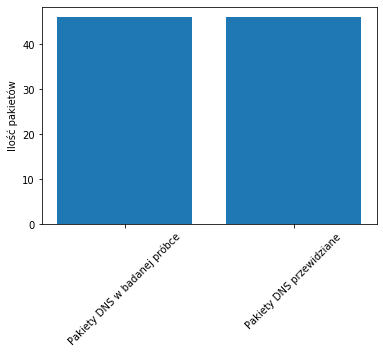

In [57]:
print(y_test.tolist().count(0))
print(y_pred.tolist().count(0))

import numpy as np
import matplotlib.pyplot as plt
etykiety1 = ['Pakiety DNS w badanej próbce', 'Pakiety DNS przewidziane']
wartosci1 = [y_test.tolist().count(0), y_pred.tolist().count(0)]
plt.bar(etykiety1, wartosci1)

plt.xticks(rotation=45)
plt.ylabel('Ilość pakietów')
plt.xlabel('')
plt.show()

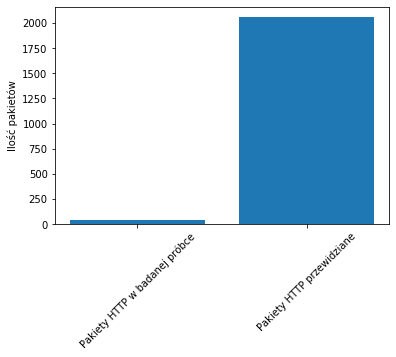

In [49]:
etykiety1 = ['Pakiety HTTP w badanej próbce', 'Pakiety HTTP przewidziane']
wartosci1 = [y_test.tolist().count(1), y_pred.tolist().count(1)]
plt.bar(etykiety1, wartosci1)

plt.xticks(rotation=45)
plt.ylabel('Ilość pakietów')
plt.xlabel('')
plt.show()

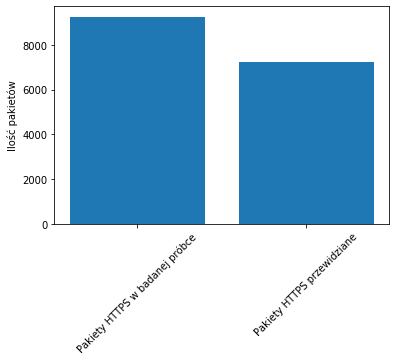

In [50]:
etykiety1 = ['Pakiety HTTPS w badanej próbce', 'Pakiety HTTPS przewidziane']
wartosci1 = [y_test.tolist().count(2), y_pred.tolist().count(2)]
plt.bar(etykiety1, wartosci1)

plt.xticks(rotation=45)
plt.ylabel('Ilość pakietów')
plt.xlabel('')
plt.show()

In [51]:
#Wiresharkowy plik co ma wieksze rozlozenie pakietow. 